In [9]:
import pandas  as pd
import numbers as np
import matplotlib.pyplot as plt
import datetime  as dt


In [2]:
df = pd.read_csv("daily-min-temperatures.csv")

In [3]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [5]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


(array([ 53., 181., 564., 862., 830., 670., 347., 102.,  32.,   9.]),
 array([ 0.  ,  2.63,  5.26,  7.89, 10.52, 13.15, 15.78, 18.41, 21.04,
        23.67, 26.3 ]),
 <BarContainer object of 10 artists>)

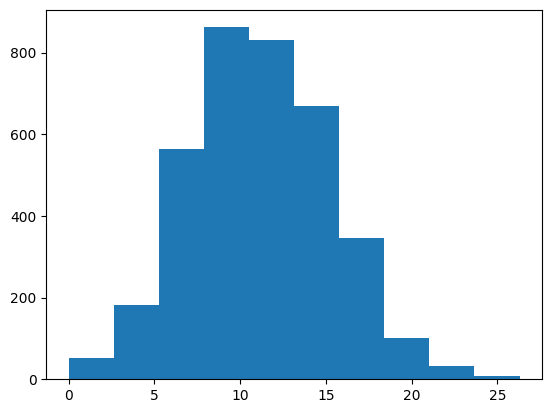

In [10]:
plt.hist(df['Temp'])

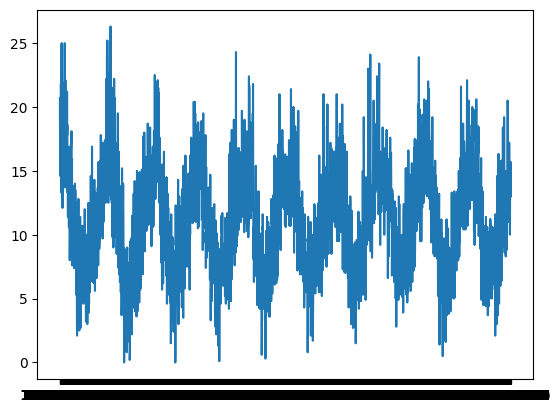

In [12]:
plt.plot(df["Date"], df["Temp"])

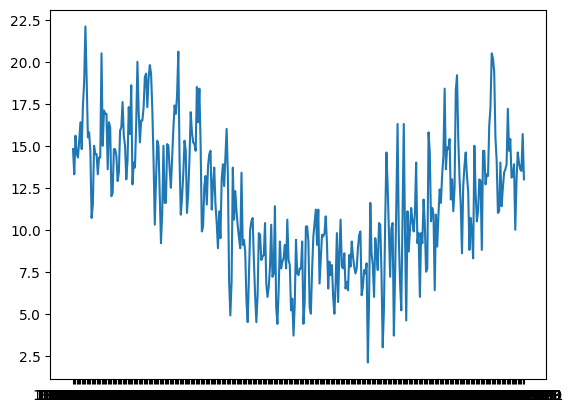

In [14]:
df_1990 = df[(df['Date']>='1990-01-01')&(df['Date']<='1990-12-31')]
plt.plot(df_1990["Date"], df_1990["Temp"])

In [20]:
df1 = pd.read_csv("OnlineRetail.csv", encoding = "ISO-8859-1")

In [22]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [51]:
df1["InvoiceDate"] = pd.to_datetime(df1["InvoiceDate"])
df1["InvoiceYear"] = df1["InvoiceDate"].dt.year
df_2011 = df1[(df1["InvoiceYear"]==2011)].drop_duplicates(keep="first")
df_2011['InvoiceDate'] = df_2011['InvoiceDate'].dt.date
df_2011.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth
119637,546561,22081,RIBBON REEL FLORA + FAUNA,10,2011-03-15,1.65,18260.0,United Kingdom,2011,3
381693,569887,23223,CHRISTMAS TREE HANGING SILVER,12,2011-10-06,0.83,13882.0,United Kingdom,2011,10
89037,543826,20986,BLUE CALCULATOR RULER,1,2011-02-14,2.46,NaN,United Kingdom,2011,2
149816,549304,22448,PIN CUSHION BABUSHKA RED,6,2011-04-08,3.35,16133.0,United Kingdom,2011,4
530474,580872,22356,CHARLOTTE BAG PINK POLKADOT,3,2011-12-06,0.85,18283.0,United Kingdom,2011,12


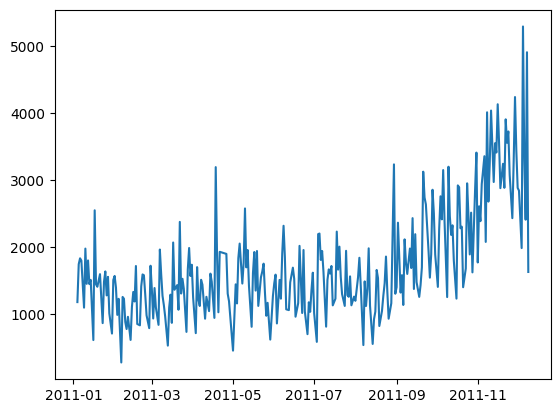

In [39]:
df_2011_d = df_2011.groupby('InvoiceDate')['InvoiceNo'].count().reset_index()
df_2011_d.columns = ['Date', 'Count']
plt.plot(df_2011_d['Date'], df_2011_d['Count'])

In [59]:
df4 = df1[['InvoiceNo', 'InvoiceYear', 'InvoiceDate']].drop_duplicates(keep='first')
df4['InvoiceMonth'] = df4['InvoiceDate'].dt.month
df5 = df4.groupby('InvoiceMonth')['InvoiceNo'].count().reset_index()
df5.columns = ['Month', 'Count']
df5

,Month,Count
0,1,1476
1,2,1393
2,3,1983
3,4,1744
4,5,2162
5,6,2012
6,7,1927
7,8,1737
8,9,2327
9,10,2637


<BarContainer object of 12 artists>

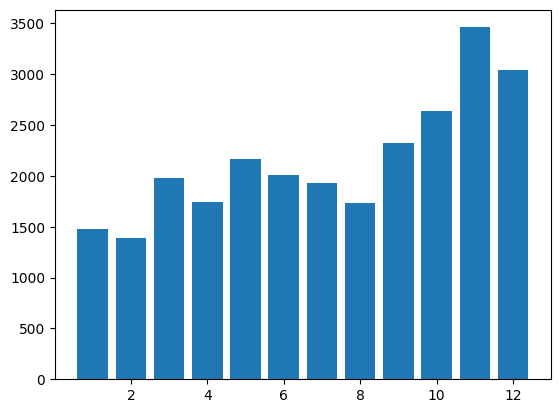

In [60]:
plt.bar(df5['Month'], df5['Count'])